Epoch 1/5
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4723 - accuracy: 0.4720
Epoch 2/5
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1197 - accuracy: 0.6084
Epoch 3/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0019 - accuracy: 0.6505
Epoch 4/5
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9223 - accuracy: 0.6783
Epoch 5/5
313/313 [==============================] - 4s 12ms/step


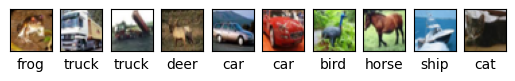

In [3]:
import numpy as np ;
import pandas as pd ;
import matplotlib.pyplot as plt ;
import tensorflow as tf ;
from tensorflow.keras import layers, models, datasets ;

(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data() ;

ytrain = ytrain.reshape(-1) ;
ytest = ytest.reshape(-1) ;

labels = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] ;

def showImage(imageIndex):
    plt.imshow(xtrain[imageIndex]) ;
    plt.xlabel(labels[ytrain[imageIndex]]) ;
    plt.xticks([]) ;
    plt.yticks([]) ;

for i in range(0, 10):
    plt.subplot(1, 10, i+1) ;
    showImage(i) ;

# Normalization
xtrainN = xtrain/255.0 ;
xtestN = xtest/255.0 ;

# CNN
convolutionNetwork = models.Sequential([
                            layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',
                                          input_shape = (32, 32, 3)),
                            layers.MaxPooling2D((2,2)),
                            layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
                            layers.MaxPooling2D((2,2)),
                            layers.Flatten(),
                            layers.Dense(64, activation = 'relu'),
                            layers.Dense(10, activation = 'softmax')
                        ]) ;

# Model Training & Evaluation
convolutionNetwork.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) ;
convolutionNetwork.fit(x=xtrainN, y=ytrain, epochs=5) ;
convolutionNetwork.evaluate(xtestN, ytest) ;
predictedY = convolutionNetwork.predict(xtestN) ;

In [16]:
from sklearn.metrics import multilabel_confusion_matrix ;
predictedLabels = [] ;
for i in predictedY:
    predictedLabels.append(np.argmax(i)) ;

cm = multilabel_confusion_matrix(ytest, predictedLabels) ;
print('Confusion Matrix\n---------------------------------------') ;
for i in range(10):
    print(labels[i], ': \n', cm[i]) ;

Confusion Matrix
---------------------------------------
airplane : 
 [[8619  381]
 [ 252  748]]
car : 
 [[8796  204]
 [ 199  801]]
bird : 
 [[8635  365]
 [ 470  530]]
cat : 
 [[8537  463]
 [ 506  494]]
deer : 
 [[8619  381]
 [ 376  624]]
dog : 
 [[8656  344]
 [ 433  567]]
frog : 
 [[8657  343]
 [ 187  813]]
horse : 
 [[8864  136]
 [ 366  634]]
ship : 
 [[8698  302]
 [ 177  823]]
truck : 
 [[8740  260]
 [ 213  787]]


In [ ]:
# ANN
connectedNetwork = models.Sequential([
                            layers.Flatten(input_shape = (32, 32, 3)),
                            layers.Dense(3000, activation='relu'),
                            layers.Dense(1000, activation = 'relu'),
                            layers.Dense(10, activation = 'softmax')
                        ]) ;

# Model Training & Evaluation
connectedNetwork.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) ;
connectedNetwork.fit(x=xtrainN, y=ytrain, epochs=5) ;
connectedNetwork.evaluate(xtestN, ytest) ;
predictedOutputFromANN = connectedNetwork.predict(xtestN) ;